In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Feature Names
feature_names = ['amino_acids', 'cleavage']

# LOAD DATA
train_df = pd.read_csv('hiv1_1.csv', names=feature_names)
test_df = pd.read_csv('hiv1_2.csv', names=feature_names)
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)
train_df.head()

Train shape: (1625, 2)
Test shape: (746, 2)


,amino_acids,cleavage
0,SLNLRETN,1
1,AECFRIFD,1
2,HLVEALYL,1
3,TQIMFETF,1
4,AEELAEIF,1


In [6]:
'''ONE HOT ENCODE AMINO ACIDS'''
amino_acids = ['G', 'P', 'A', 'V', 'L', 'I', 'M', 'C', 'F', 'Y', 'W', 'H' ,'K',
               'R', 'Q', 'N', 'E', 'D', 'S', 'T']

# Create aa Columns by position
for amino_acid in amino_acids:
    for i in range(8):
        amino_pos = amino_acid + str(i)
        train_df[amino_pos] = 0
        test_df[amino_pos] = 0

# Combine DataFrames Momentarily
combined_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
    
# One-Hot Encodings of Amino Acids
for i, protein in enumerate(combined_df['amino_acids'].values):
    # Iterate through protein sequence
    for j, aa in enumerate(protein):
        amino_pos = aa + str(j)
        combined_df.loc[i, amino_pos] = 1

In [7]:
combined_df.head()

,amino_acids,cleavage,G0,G1,G2,G3,G4,G5,G6,G7,...,S6,S7,T0,T1,T2,T3,T4,T5,T6,T7
0,SLNLRETN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,AECFRIFD,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HLVEALYL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TQIMFETF,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,AEELAEIF,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Drop amino_acids string
combined_df = combined_df.drop(columns='amino_acids')
combined_df.shape

(2371, 161)

In [9]:
data_x = combined_df.iloc[:, 1:]
data_y = combined_df.iloc[:, 0]

In [10]:
from sklearn.model_selection import train_test_split

# Random Train Test Split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Prevents issues with CV
train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [11]:
print(train_y.value_counts())
print(test_y.value_counts())

-1    1125
 1     534
Name: cleavage, dtype: int64
-1    469
 1    243
Name: cleavage, dtype: int64


In [69]:
from helper import kmeans_and_silhouette, kmeans_variable_clusters, gmm_variable_clusters,\
cluster_accuracy
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

dataset = 'HIV1'

### k-Means Clustering

Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.032013098812171605
For n_clusters = 3 The average silhouette_score is : 0.03777449468234637
For n_clusters = 4 The average silhouette_score is : 0.0418071795863255
For n_clusters = 5 The average silhouette_score is : 0.04879481234433379
For n_clusters = 6 The average silhouette_score is : 0.04942973160563917
For n_clusters = 7 The average silhouette_score is : 0.052507473721575895
For n_clusters = 8 The average silhouette_score is : 0.05600304563580092
For n_clusters = 9 The average silhouette_score is : 0.059352146619381395
For n_clusters = 10 The average silhouette_score is : 0.06322108021624036
For n_clusters = 11 The average silhouette_score is : 0.06776775721047822
For n_clusters = 12 The average silhouette_score is : 0.0710533084412123
For n_clusters = 13 The average silhouette_score is : 0.07247980598291505
For n_clusters = 14 The average silhouette_score is : 0.07500285186209

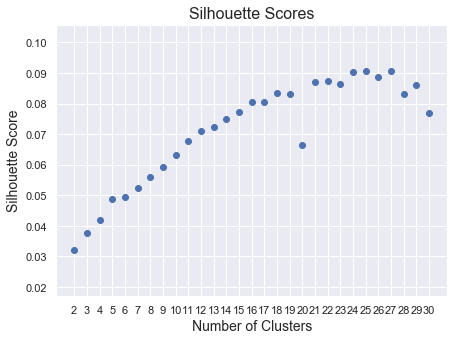

In [13]:
scores, n_clusters = kmeans_and_silhouette(30, data_x)

method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + ".png")

plt.show()

In [11]:
# BUILD MODEL with chosen hyperparamter and calculate accuracy for entire dataset
kmeans = KMeans(n_clusters=21, random_state=42)
kmeans.fit(data_x)
pred = kmeans.predict(data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.8907633909742725


### Expectation Maximization/Gaussian Mixture Models
- Randomly places Gaussians in space (chooses random mean and variance)
- Then looks at each data points and figures which Gaussian it belongs to (cluster)
- Readjust the mean and variance of each Gaussian based off the points thats been assigned to that Gaussian
- Repeat until convergence

Number of clusters from 1 to 15 are being tested


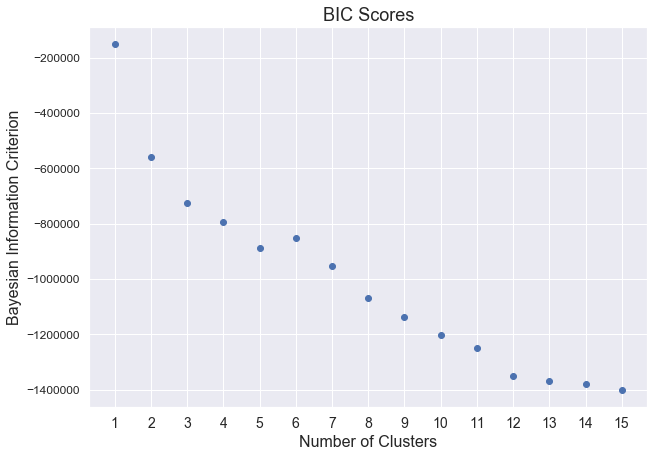

In [22]:
scores, n_clusters = gmm_variable_clusters(15, data_x, 'diag')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + ".png")

plt.show()

In [24]:
gmm = GaussianMixture(n_components=12, random_state=42)
gmm.fit(data_x)
pred = gmm.predict(data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.8785322648671446


### PCA

In [114]:
n_components = 83

pca = PCA(n_components=n_components, random_state=42)

# Fit on input training data and transform it
pca_data_x = pca.fit_transform(data_x)

print(pca.explained_variance_ratio_)
print("Amount explained by", n_components, "components:", sum(pca.explained_variance_ratio_))

[0.39801282 0.32656256 0.26989168 0.22088871 0.18921551 0.1416176
 0.11736208 0.10224448 0.09904545 0.09645172 0.09382749 0.09300175
 0.08533207 0.0844672  0.08409491 0.08056861 0.0801767  0.07787571
 0.07560255 0.0744622  0.07327908 0.07236204 0.0700116  0.06935673
 0.06854824 0.06772106 0.06524867 0.06505046 0.06479981 0.06437133
 0.063873   0.06266984 0.06203252 0.06120826 0.06015246 0.05958796
 0.05858889 0.0572302  0.05671904 0.05637635 0.05577014 0.05526955
 0.05518058 0.05447277 0.05302956 0.0522955  0.05213668 0.05178161
 0.05078555 0.04971221 0.04966149 0.04931074 0.04893983 0.04812872
 0.04775285 0.04713548 0.04629449 0.04594776 0.04564964 0.04558139
 0.04471935 0.04324773 0.04316237 0.04266802 0.04251331 0.04164677
 0.04092747 0.04083689 0.04042207 0.04010176 0.03955785 0.03869722
 0.03850743 0.03817754 0.0379704  0.03711413 0.03662557 0.03644018
 0.03599909 0.03552987 0.03526562 0.03465667 0.03416089]
[0.05347984 0.04387927 0.03626457 0.02968018 0.02542434 0.01902875
 0.015

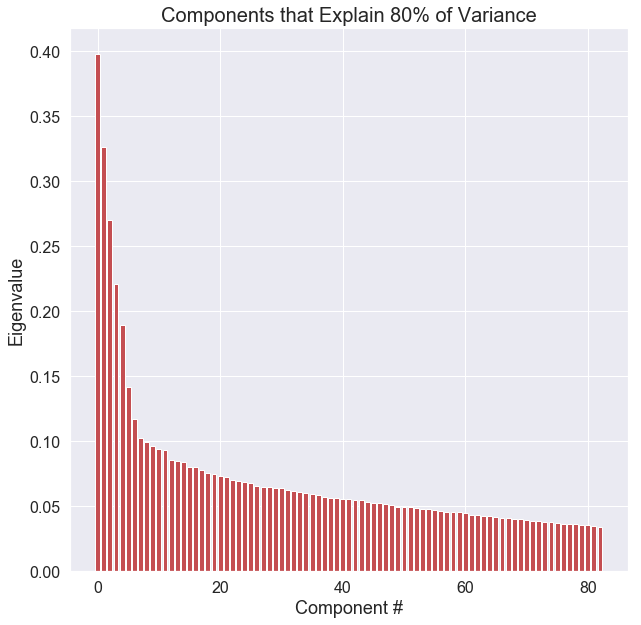

In [122]:
# DISTRIBUTION OF EIGENVALUES
eigenvalues = pca.explained_variance_

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.bar(range(len(eigenvalues)), eigenvalues,
       color="r", align="center")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Components that Explain 80% of Variance", fontsize=20)
plt.xlabel("Component #", fontsize=18)
plt.ylabel("Eigenvalue", fontsize=18)

# Saving plots
plt.savefig("plots/" + dataset + '_pca.png')

plt.show()

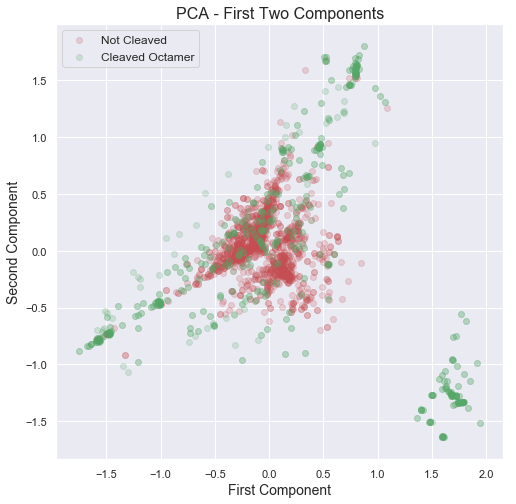

In [118]:
# Plot first two components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Component', fontsize = 14)
ax.set_ylabel('Second Component', fontsize = 14)
ax.set_title('PCA - First Two Components', fontsize = 16)
targets = [-1, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    target_indices = data_y == target
    ax.scatter(pca_data_x[target_indices, 0]
               , pca_data_x[target_indices, 1]
               , c = color
               , alpha = 0.2)
leg = ax.legend(['Not Cleaved', 'Cleaved Octamer'], fontsize=12)

# Saving plots
plt.savefig("plots/" + dataset + '_' + 'pca_components.png')

plt.show()

Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.07198566854509518
For n_clusters = 3 The average silhouette_score is : 0.07228552661107625
For n_clusters = 4 The average silhouette_score is : 0.07883301747236088
For n_clusters = 5 The average silhouette_score is : 0.08760692829124138
For n_clusters = 6 The average silhouette_score is : 0.08978474179939269
For n_clusters = 7 The average silhouette_score is : 0.09000891946463357
For n_clusters = 8 The average silhouette_score is : 0.09136652182120561
For n_clusters = 9 The average silhouette_score is : 0.098732715533392
For n_clusters = 10 The average silhouette_score is : 0.09938061282680116
For n_clusters = 11 The average silhouette_score is : 0.10327715118935792
For n_clusters = 12 The average silhouette_score is : 0.10624528903990064
For n_clusters = 13 The average silhouette_score is : 0.10594743870508992
For n_clusters = 14 The average silhouette_score is : 0.11111500160748516

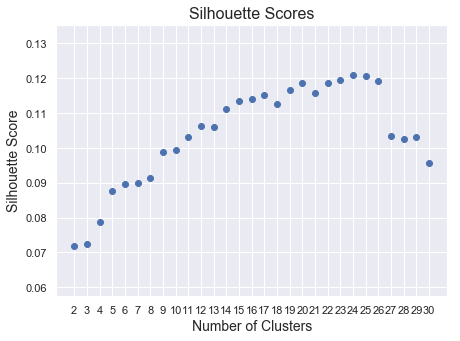

In [119]:
scores, n_clusters = kmeans_and_silhouette(30, pca_data_x)

analysis = 'pca'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

Number of clusters from 1 to 15 are being tested


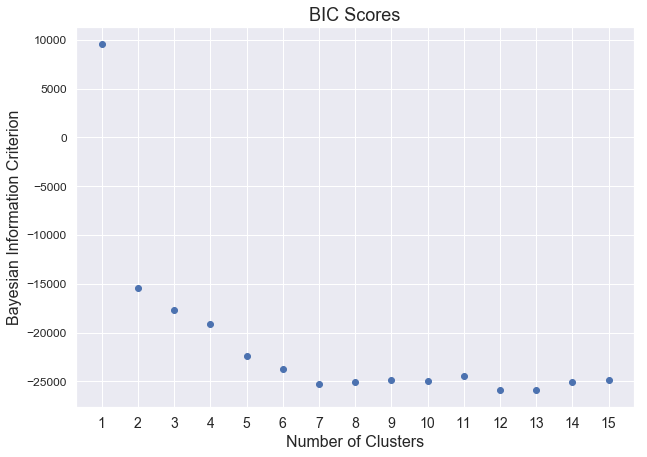

In [120]:
scores, n_clusters = gmm_variable_clusters(15, pca_data_x, 'diag')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [121]:
# Get Accuracy Scores
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(pca_data_x)
pred = kmeans.predict(pca_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(pca_data_x)
pred = gmm.predict(pca_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.883171657528469
Clustering accuracy: 0.8772669759595108


### ICA

In [125]:
n_components = 160

ica = FastICA(n_components=n_components, random_state=42)

# Fit on input training data, transform it, convert to dataframe
ica_data_x = ica.fit_transform(data_x)
ica_data_x = pd.DataFrame(ica_data_x)

kurtosis = ica_data_x.kurtosis()

threshold = 30.2
columns = []
count = 0
# Find features with kurtosis greater than threshold
for i, component in enumerate(kurtosis):
    if component > threshold:
        columns.append(i)
        count += 1
print('Total Components:', count)

ica_data_x = ica_data_x.iloc[:, columns]

Total Components: 2


/Users/jdemeo/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


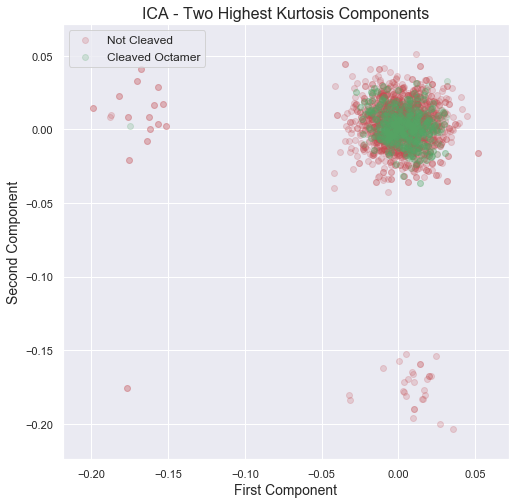

In [123]:
# Plot highest curtosis components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Component', fontsize = 14)
ax.set_ylabel('Second Component', fontsize = 14)
ax.set_title('ICA - Two Highest Kurtosis Components', fontsize = 16)
targets = [-1, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    target_indices = data_y == target
    ax.scatter(ica_data_x.loc[target_indices, 89]
               , ica_data_x.loc[target_indices, 138]
               , c = color
               , alpha = 0.2)
leg = ax.legend(['Not Cleaved', 'Cleaved Octamer'], fontsize=12)

# Saving plots
plt.savefig("plots/" + dataset + '_' + 'ica_components.png')

plt.show()

In [129]:
n_components = 160

ica = FastICA(n_components=n_components, random_state=42)

# Fit on input training data, transform it, convert to dataframe
ica_data_x = ica.fit_transform(data_x)
ica_data_x = pd.DataFrame(ica_data_x)

kurtosis = ica_data_x.kurtosis()

threshold = 10
columns = []
count = 0
# Find features with kurtosis greater than threshold
for i, component in enumerate(kurtosis):
    if component > threshold:
        columns.append(i)
        count += 1
print('Total Components:', count)

ica_data_x = ica_data_x.iloc[:, columns]

Total Components: 56


/Users/jdemeo/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


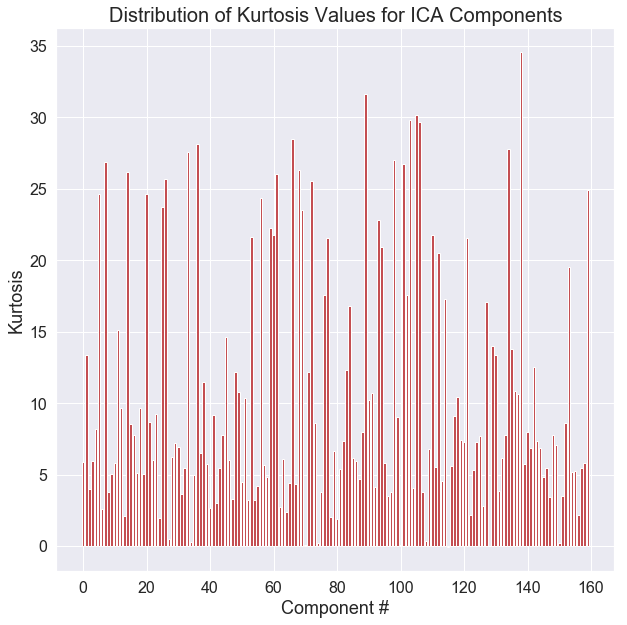

In [132]:
# DISTRIBUTION OF Kurtosis values

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.bar(range(len(kurtosis)), kurtosis,
       color="r", align="center")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Distribution of Kurtosis Values for ICA Components", fontsize=20)
plt.xlabel("Component #", fontsize=18)
plt.ylabel("Kurtosis", fontsize=18)

# Saving plots
plt.savefig("plots/" + dataset + '_ica.png')

plt.show()

Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.08743140699388706
For n_clusters = 3 The average silhouette_score is : 0.06826119678113396
For n_clusters = 4 The average silhouette_score is : 0.05472335803218095
For n_clusters = 5 The average silhouette_score is : 0.04281736695152697
For n_clusters = 6 The average silhouette_score is : 0.04840004247675434
For n_clusters = 7 The average silhouette_score is : 0.0313181010844649
For n_clusters = 8 The average silhouette_score is : 0.049056349876085585
For n_clusters = 9 The average silhouette_score is : 0.055345829179984846
For n_clusters = 10 The average silhouette_score is : 0.054991031939602496
For n_clusters = 11 The average silhouette_score is : 0.05140907019263299
For n_clusters = 12 The average silhouette_score is : 0.03975099739221987
For n_clusters = 13 The average silhouette_score is : 0.05042379857201679
For n_clusters = 14 The average silhouette_score is : 0.0430894511699

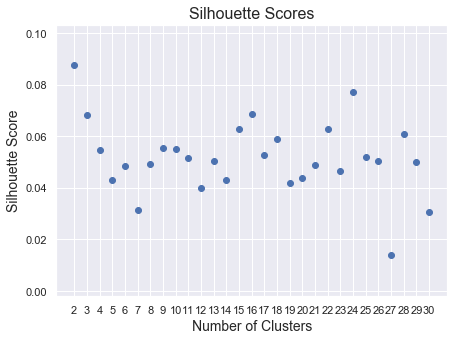

In [125]:
scores, n_clusters = kmeans_and_silhouette(30, ica_data_x)

analysis = 'ica'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

Number of clusters from 1 to 15 are being tested


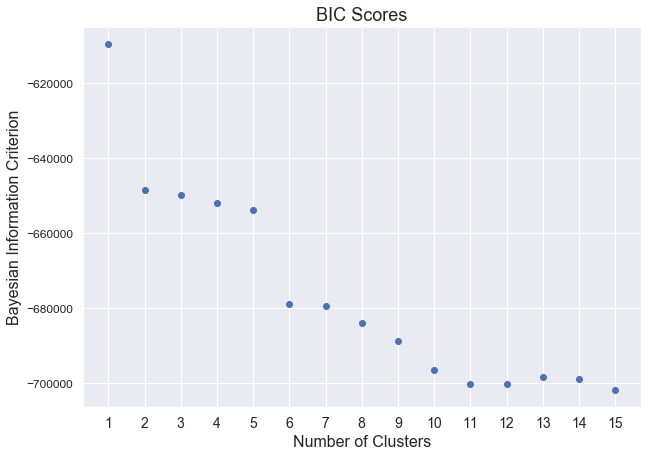

In [126]:
scores, n_clusters = gmm_variable_clusters(15, ica_data_x, 'diag')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [127]:
# Get Accuracy Scores
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(ica_data_x)
pred = kmeans.predict(ica_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(ica_data_x)
pred = gmm.predict(ica_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.687051876845213
Clustering accuracy: 0.7013918177983973


### RCA

In [97]:
# Repeat experiment multiple times
repeat = 20
n_components = 80
kmeans_scores = []
gmm_scores = []

for i in range(repeat):
    grp = GaussianRandomProjection(n_components=n_components)

    # Fit on input training data and transform it
    grp_data_x = grp.fit_transform(data_x)
    
    scores1, n_clusters = kmeans_and_silhouette(30, grp_data_x)
    scores2, n_clusters = gmm_variable_clusters(15, grp_data_x, 'diag')
    kmeans_scores.append(scores1)
    gmm_scores.append(scores2)

Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.04331970833765194
For n_clusters = 3 The average silhouette_score is : 0.04207810989807849
For n_clusters = 4 The average silhouette_score is : 0.04653422020059467
For n_clusters = 5 The average silhouette_score is : 0.04772540545878782
For n_clusters = 6 The average silhouette_score is : 0.04209888829635631
For n_clusters = 7 The average silhouette_score is : 0.04934412042729389
For n_clusters = 8 The average silhouette_score is : 0.053678031511882836
For n_clusters = 9 The average silhouette_score is : 0.05897679078708078
For n_clusters = 10 The average silhouette_score is : 0.06099846074256871
For n_clusters = 11 The average silhouette_score is : 0.065204098838708
For n_clusters = 12 The average silhouette_score is : 0.06635348108273502
For n_clusters = 13 The average silhouette_score is : 0.0671841846329254
For n_clusters = 14 The average silhouette_score is : 0.07146602872307929

For n_clusters = 22 The average silhouette_score is : 0.06604641979629593
For n_clusters = 23 The average silhouette_score is : 0.08442841878323318
For n_clusters = 24 The average silhouette_score is : 0.08656089728588574
For n_clusters = 25 The average silhouette_score is : 0.08301104056719473
For n_clusters = 26 The average silhouette_score is : 0.0858547555808486
For n_clusters = 27 The average silhouette_score is : 0.07093959905878348
For n_clusters = 28 The average silhouette_score is : 0.08914670332106792
For n_clusters = 29 The average silhouette_score is : 0.07023287291731559
For n_clusters = 30 The average silhouette_score is : 0.06865990015833368
Number of clusters from 1 to 15 are being tested
Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.04540251964213387
For n_clusters = 3 The average silhouette_score is : 0.04911494999837181
For n_clusters = 4 The average silhouette_score is : 0.044959569322493495
For n_clusters = 

For n_clusters = 12 The average silhouette_score is : 0.05885249120379357
For n_clusters = 13 The average silhouette_score is : 0.06329799920583404
For n_clusters = 14 The average silhouette_score is : 0.0648153280146868
For n_clusters = 15 The average silhouette_score is : 0.06330200910921788
For n_clusters = 16 The average silhouette_score is : 0.06715041302603185
For n_clusters = 17 The average silhouette_score is : 0.06631903358005245
For n_clusters = 18 The average silhouette_score is : 0.06915959771990204
For n_clusters = 19 The average silhouette_score is : 0.07075335223565525
For n_clusters = 20 The average silhouette_score is : 0.07279008146314857
For n_clusters = 21 The average silhouette_score is : 0.054738298306989314
For n_clusters = 22 The average silhouette_score is : 0.0741287757697026
For n_clusters = 23 The average silhouette_score is : 0.0562950715516232
For n_clusters = 24 The average silhouette_score is : 0.07799986273781902
For n_clusters = 25 The average silhouet

For n_clusters = 2 The average silhouette_score is : 0.04075898491224911
For n_clusters = 3 The average silhouette_score is : 0.026343925034682317
For n_clusters = 4 The average silhouette_score is : 0.03380139999426566
For n_clusters = 5 The average silhouette_score is : 0.044062685401591105
For n_clusters = 6 The average silhouette_score is : 0.04919135156589186
For n_clusters = 7 The average silhouette_score is : 0.04687236008790792
For n_clusters = 8 The average silhouette_score is : 0.04873865791506169
For n_clusters = 9 The average silhouette_score is : 0.05307735201195204
For n_clusters = 10 The average silhouette_score is : 0.05593346181438537
For n_clusters = 11 The average silhouette_score is : 0.05894516024931795
For n_clusters = 12 The average silhouette_score is : 0.061710694906403386
For n_clusters = 13 The average silhouette_score is : 0.06281384966378602
For n_clusters = 14 The average silhouette_score is : 0.06671207714865078
For n_clusters = 15 The average silhouette_

For n_clusters = 23 The average silhouette_score is : 0.08205348769832811
For n_clusters = 24 The average silhouette_score is : 0.08254305911236774
For n_clusters = 25 The average silhouette_score is : 0.06678212636666397
For n_clusters = 26 The average silhouette_score is : 0.05707273472005836
For n_clusters = 27 The average silhouette_score is : 0.054691988595229314
For n_clusters = 28 The average silhouette_score is : 0.07372273807264125
For n_clusters = 29 The average silhouette_score is : 0.07269160666704656
For n_clusters = 30 The average silhouette_score is : 0.08430645599251851
Number of clusters from 1 to 15 are being tested
Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.04344924703529345
For n_clusters = 3 The average silhouette_score is : 0.04739746768645571
For n_clusters = 4 The average silhouette_score is : 0.05008081729221007
For n_clusters = 5 The average silhouette_score is : 0.05752695673366104
For n_clusters = 

For n_clusters = 13 The average silhouette_score is : 0.07784020409905039
For n_clusters = 14 The average silhouette_score is : 0.07987712042597614
For n_clusters = 15 The average silhouette_score is : 0.08095256516564066
For n_clusters = 16 The average silhouette_score is : 0.0825491917459363
For n_clusters = 17 The average silhouette_score is : 0.08236509880178508
For n_clusters = 18 The average silhouette_score is : 0.08345894039324839
For n_clusters = 19 The average silhouette_score is : 0.08531566399440248
For n_clusters = 20 The average silhouette_score is : 0.08477730769416086
For n_clusters = 21 The average silhouette_score is : 0.08734767184675235
For n_clusters = 22 The average silhouette_score is : 0.09052983065321311
For n_clusters = 23 The average silhouette_score is : 0.08890535890360028
For n_clusters = 24 The average silhouette_score is : 0.07397989440692544
For n_clusters = 25 The average silhouette_score is : 0.06527632115695937
For n_clusters = 26 The average silhoue

In [98]:
# Create Dataframe and Collect data metrics
new_kmeans_scores = pd.DataFrame(kmeans_scores)
new_gmm_scores = pd.DataFrame(gmm_scores)
kmeans_mean = new_kmeans_scores.mean()
gmm_mean = new_gmm_scores.mean()
kmeans_SD = new_kmeans_scores.std(axis=0)
gmm_SD = new_gmm_scores.std(axis=0)

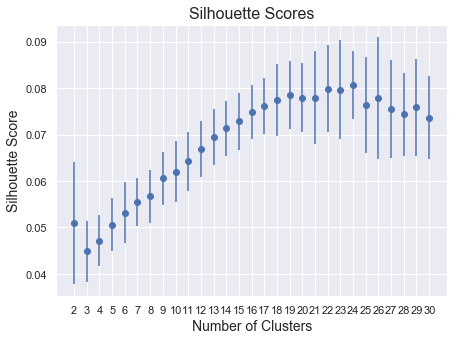

In [99]:
n_clusters = [i for i in range(2, 31)]
analysis = 'rca'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.errorbar(x=n_clusters, y=kmeans_mean, yerr=kmeans_SD, fmt='o')

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

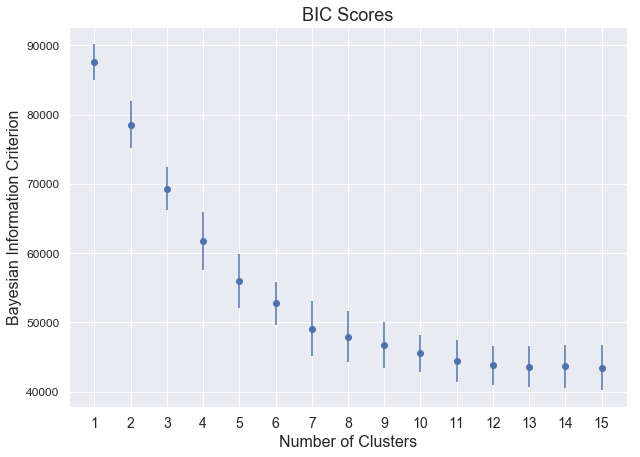

In [100]:
n_clusters = [i for i in range(1, 16)]
method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.errorbar(x=n_clusters, y=gmm_mean, yerr=gmm_SD, fmt='o')

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [101]:
grp = GaussianRandomProjection(n_components=80)

# Fit on input training data and transform it
grp_data_x = grp.fit_transform(data_x)

# Get Accuracy Scores
kmeans = KMeans(n_clusters=19, random_state=42)
kmeans.fit(grp_data_x)
pred = kmeans.predict(grp_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=9, random_state=42)
gmm.fit(grp_data_x)
pred = gmm.predict(grp_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.8696752425137073
Clustering accuracy: 0.8156895824546605


### Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=42)

clf.fit(train_x, train_y)

clf.score(test_x, test_y)

0.9578651685393258

0.503407948226773


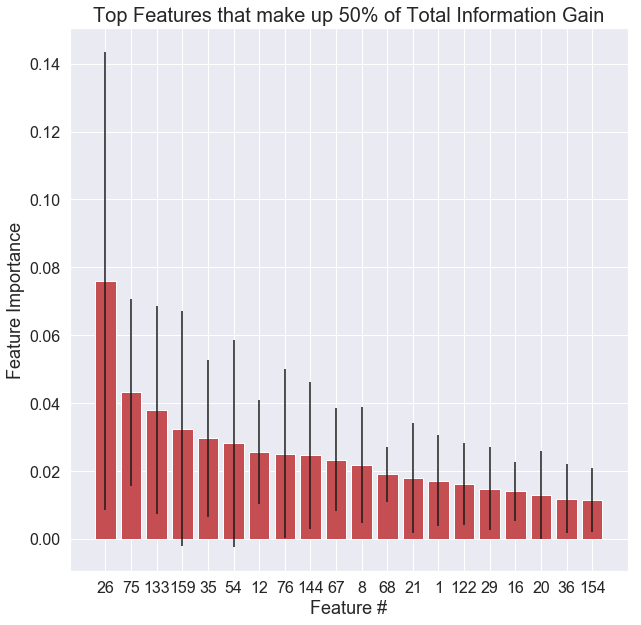

In [135]:
'''FEATURE IMPORTANCES'''
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

num_important_features = 20
indices = np.argsort(importances)[::-1][:num_important_features]

# All importances up to 50%
print(np.sum(importances[indices][:num_important_features]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))

plt.bar(range(train_x.shape[1])[:num_important_features], importances[indices],
       color="r", yerr=std[indices], align="center")

plt.xticks(range(train_x.shape[1])[:num_important_features], indices, fontsize=16)
plt.yticks(fontsize=16)
plt.title("Top Features that make up 50% of Total Information Gain", fontsize=20)
plt.xlabel("Feature #", fontsize=18)
plt.ylabel("Feature Importance", fontsize=18)

# Saving plots
plt.savefig("plots/" + dataset + '_rf.png')

plt.show()

# New Reduced Feature set
rf_data_x = data_x.iloc[:, indices]

Number of clusters from 1 to 30 are being tested
For n_clusters = 2 The average silhouette_score is : 0.24726280052676647
For n_clusters = 3 The average silhouette_score is : 0.2687614509928073
For n_clusters = 4 The average silhouette_score is : 0.2732729369420189
For n_clusters = 5 The average silhouette_score is : 0.2692850914598053
For n_clusters = 6 The average silhouette_score is : 0.27586395983300543
For n_clusters = 7 The average silhouette_score is : 0.27450841309228113
For n_clusters = 8 The average silhouette_score is : 0.2511276906106554
For n_clusters = 9 The average silhouette_score is : 0.27778380979225104
For n_clusters = 10 The average silhouette_score is : 0.2746636540041253
For n_clusters = 11 The average silhouette_score is : 0.289854509597259
For n_clusters = 12 The average silhouette_score is : 0.2961504127806706
For n_clusters = 13 The average silhouette_score is : 0.29193350775577565
For n_clusters = 14 The average silhouette_score is : 0.30995939321973004
For n

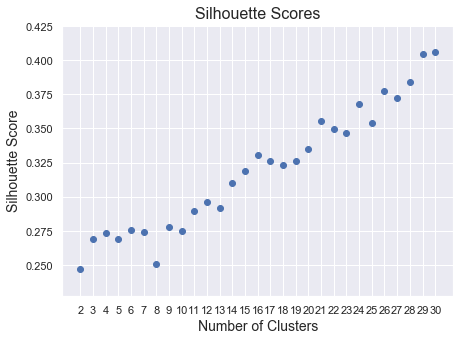

In [109]:
scores, n_clusters = kmeans_and_silhouette(30, rf_data_x)

analysis = 'rf'
method = 'kmeans'
title = 'Silhouette Scores'

plt.figure(figsize=(7,5))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=16)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

Number of clusters from 1 to 15 are being tested


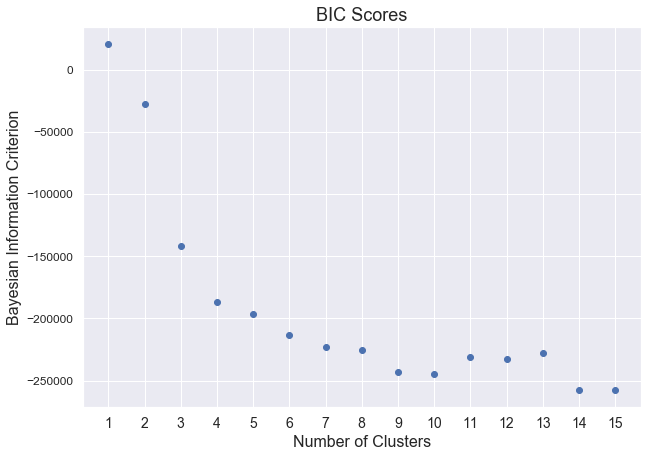

In [38]:
scores, n_clusters = gmm_variable_clusters(15, rf_data_x, 'diag')

method = 'gmm'
title = 'BIC Scores'

plt.figure(figsize=(10,7))
sns.set()
plt.scatter(x=n_clusters, y=scores)

plt.title(title, fontsize=18)
plt.xticks(n_clusters, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel("Bayesian Information Criterion", fontsize=16)

# Saving plots
plt.savefig("plots/" + dataset + '_' + method + '_' + analysis + ".png")

plt.show()

In [110]:
# Get Accuracy Scores
kmeans = KMeans(n_clusters=29, random_state=42)
kmeans.fit(rf_data_x)
pred = kmeans.predict(rf_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

gmm = GaussianMixture(n_components=9, random_state=42)
gmm.fit(rf_data_x)
pred = gmm.predict(rf_data_x)

accuracy = cluster_accuracy(data_y, pred)
print('Clustering accuracy:', accuracy)

Clustering accuracy: 0.8852804723745256
Clustering accuracy: 0.7659215520877267


## Neural Network Analysis

In [140]:
# Scorers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import time

In [141]:
# Build Architecture
def build_nn(train_x, test_x):
    clf = MLPClassifier(hidden_layer_sizes=(160, 160), max_iter=35, 
                        learning_rate_init=0.001)

    start = time.time()
    print('2-fold CV Accuracy:', np.mean(cross_val_score(clf, train_x, train_y, cv=2)))
    end = time.time()
    time_elapsed = end - start
    print('Time elapsed for cross-validation:', time_elapsed)
    
    clf.fit(train_x, train_y)

    pred = clf.predict(test_x)

    print('Test Accuracy:', clf.score(test_x, test_y))

    print(confusion_matrix(test_y, pred))

In [142]:
# Create Dimensionality Reduction Datasets
# PCA
pca = PCA(n_components=83, random_state=42)
pca.fit(data_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

# ICA
ica = FastICA(n_components=160, random_state=42)
ica_data_x = ica.fit_transform(data_x)
ica_train_x = ica.transform(train_x)
ica_test_x = ica.transform(test_x)
ica_data_x = pd.DataFrame(ica_data_x)
kurtosis = ica_data_x.kurtosis()

threshold = 10
columns = []
count = 0
# Find features with kurtosis greater than threshold
for i, component in enumerate(kurtosis):
    if component > threshold:
        columns.append(i)
        count += 1
print('Total Components:', count)
ica_train_x = ica_train_x[:, columns]
ica_test_x = ica_test_x[:, columns]

# RCA
grp = GaussianRandomProjection(n_components=80)
grp.fit_transform(data_x)
grp_train_x = pca.transform(train_x)
grp_test_x = pca.transform(test_x)

# RF (@indices from random forest section)
rf_train_x = train_x.iloc[:, indices]
rf_test_x = test_x.iloc[:, indices]

Total Components: 56


/Users/jdemeo/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [143]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Perform 2-fold CV and Test
print('--Full dataset--')
build_nn(train_x, test_x)
print('--PCA dataset--')
build_nn(pca_train_x, pca_test_x)
print('--ICA dataset--')
build_nn(ica_train_x, ica_test_x)
print('--RCA dataset--')
build_nn(grp_train_x, grp_test_x)
print('--RF dataset--')
build_nn(rf_train_x, rf_test_x)

--Full dataset--
2-fold CV Accuracy: 0.9493619835191187
Time elapsed for cross-validation: 0.8167481422424316
Test Accuracy: 0.9775280898876404
[[459  10]
 [  6 237]]
--PCA dataset--
2-fold CV Accuracy: 0.9409238885578501
Time elapsed for cross-validation: 0.7788381576538086
Test Accuracy: 0.9691011235955056
[[455  14]
 [  8 235]]
--ICA dataset--
2-fold CV Accuracy: 0.7829922827619282
Time elapsed for cross-validation: 0.6000969409942627
Test Accuracy: 0.8146067415730337
[[394  75]
 [ 57 186]]
--RCA dataset--
2-fold CV Accuracy: 0.9427303908032614
Time elapsed for cross-validation: 0.6609578132629395
Test Accuracy: 0.9705056179775281
[[458  11]
 [ 10 233]]
--RF dataset--
2-fold CV Accuracy: 0.9204325141337364
Time elapsed for cross-validation: 0.5356581211090088
Test Accuracy: 0.9213483146067416
[[439  30]
 [ 26 217]]


In [144]:
# K-means Clustering Dataset
kmeans = KMeans(n_clusters=21, random_state=42)
kmeans.fit(data_x)
pred = kmeans.predict(data_x)

new_data_x = data_x.copy()

# Create one-hot encodings of cluster labels
for label in set(pred):
    new_data_x[str(label)] = 0
    for i in range(len(new_data_x)):
        if pred[i] == label:
            new_data_x.loc[i, str(label)] = 1

# Train Test split
# Random Train Test Split
kmeans_train_x, kmeans_test_x, train_y, test_y = train_test_split(new_data_x, data_y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Prevents issues with CV
kmeans_train_x.reset_index(drop=True, inplace=True)
kmeans_test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

print('--Kmeans dataset--')
build_nn(kmeans_train_x, kmeans_test_x)

--Kmeans dataset--
2-fold CV Accuracy: 0.9463513886668508
Time elapsed for cross-validation: 0.7816829681396484
Test Accuracy: 0.9747191011235955
[[457  12]
 [  6 237]]


In [145]:
# GMM Clustering Dataset
gmm = GaussianMixture(n_components=12, random_state=42)
gmm.fit(data_x)
pred = gmm.predict(data_x)

new_data_x = data_x.copy()

# Create one-hot encodings of cluster labels
for label in set(pred):
    new_data_x[str(label)] = 0
    for i in range(len(new_data_x)):
        if pred[i] == label:
            new_data_x.loc[i, str(label)] = 1

# Train Test split
# Random Train Test Split
gmm_train_x, gmm_test_x, train_y, test_y = train_test_split(new_data_x, data_y,
                                                    test_size=0.30,
                                                    shuffle=True,
                                                    random_state=42)

# Prevents issues with CV
gmm_train_x.reset_index(drop=True, inplace=True)
gmm_test_x.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

print('--Kmeans dataset--')
build_nn(gmm_train_x, gmm_test_x)

--Kmeans dataset--
2-fold CV Accuracy: 0.9487610272210676
Time elapsed for cross-validation: 0.8066070079803467
Test Accuracy: 0.9719101123595506
[[457  12]
 [  8 235]]
